In [1]:
# !pip install albumentations
# !pip install glob
# !pip install timm
# !pip install opencv-python
# !pip install matplotlib
# !pip install torch torchvision

In [2]:
import torch
from albumentations import (Compose,Normalize, Resize)
from albumentations.pytorch import ToTensorV2
import glob
import timm
import cv2
from matplotlib import pyplot as plt
from models import get_model
import numpy as np
import cv2
import pandas as pd
import numpy as np
import mne

In [3]:
channel_list = ['AF1', 'AF2', 'AF7', 'AF8', 'AFZ', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ', 'CZ', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ', 'FP1', 'FP2', 'FPZ', 'FT7', 'FT8', 'FZ', 'O1', 'O2', 'OZ', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PO1', 'PO2', 'PO7', 'PO8', 'POZ', 'PZ', 'T7', 'T8', 'TP7', 'TP8', 'X', 'Y', 'nd']
def plot_eeg(signal_array, save_path_animation=None):
    # select channel X,Y format
    montage = mne.channels.make_standard_montage('standard_1020')
    
    # remove channels that don't have X,Y positions
    ch_to_remove = []
    for ch in channel_list:
        if ch not in list(set(montage.ch_names).intersection(channel_list)):
            ch_to_remove.append(channel_list.index(ch))
    arr = np.delete(signal_array.copy(), ch_to_remove, axis=0)
    
    # create info+evoked objects
    info = mne.create_info(ch_names=list(set(montage.ch_names).intersection(channel_list)), sfreq=256, ch_types='eeg')
    evoked = mne.EvokedArray(arr, info)
    
    # set channel X,Y positions
    evoked.set_montage(montage)

    # plot img
    evoked.plot_topomap(np.arange(0.05, 1, 0.1), ch_type='eeg', time_unit='s', ncols=5, nrows=2,cmap='jet');
#     help(evoked.plot_topomap)
    # (optional) plot and save animation
    if save_path_animation:
        fig, anim = evoked.animate_topomap(times=np.arange(0.00, 1, 0.01), frame_rate=10, butterfly=True, blit=False, );
        anim.save(save_path_animation)
        print('saved to', save_path_animation)

In [4]:
from config import Config

In [5]:
class config:
    size = 384
    path = "./output"
    models = "./output/tf_efficientnet_b5_ns_fold3_best.pth"
    d = 'cuda:0' # for cpu d="cpu"
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    num_classes=1
    gradcam = True
CFG = config()
CFG.models

'./output/tf_efficientnet_b5_ns_fold3_best.pth'

In [6]:
transform = Compose([
#             Resize(CFG.size, CFG.size),
            Normalize(
                mean=CFG.mean,
                std=CFG.std,
            ),
            ToTensorV2(),
        ])

In [7]:
model_name = 'tf_efficientnet_b5_ns'
model = get_model(Config,model_name).to(CFG.d)
# load_my_state_dict(model,torch.load(CFG.models,map_location='cpu')['model'])
model.load_state_dict(torch.load(CFG.models,map_location='cpu')['model'], strict=False)

/home/kaor/.conda/envs/mmdet/lib/python3.7/site-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


_IncompatibleKeys(missing_keys=['LSTM.lstm1.weight_ih_l0', 'LSTM.lstm1.weight_hh_l0', 'LSTM.lstm1.bias_ih_l0', 'LSTM.lstm1.bias_hh_l0', 'LSTM.lstm1.weight_ih_l0_reverse', 'LSTM.lstm1.weight_hh_l0_reverse', 'LSTM.lstm1.bias_ih_l0_reverse', 'LSTM.lstm1.bias_hh_l0_reverse', 'LSTM.lstm2.weight_ih_l0', 'LSTM.lstm2.weight_hh_l0', 'LSTM.lstm2.bias_ih_l0', 'LSTM.lstm2.bias_hh_l0', 'LSTM.lstm2.weight_ih_l0_reverse', 'LSTM.lstm2.weight_hh_l0_reverse', 'LSTM.lstm2.bias_ih_l0_reverse', 'LSTM.lstm2.bias_hh_l0_reverse', 'LSTM.linear1.weight', 'LSTM.linear1.bias', 'LSTM.linear2.weight', 'LSTM.linear2.bias', 'LSTM.head_lstm.weight', 'LSTM.head_lstm.bias', 'TABULAR.meta.0.weight', 'TABULAR.meta.0.bias', 'TABULAR.meta.1.weight', 'TABULAR.meta.1.bias', 'TABULAR.meta.1.running_mean', 'TABULAR.meta.1.running_var', 'TABULAR.meta.4.weight', 'TABULAR.meta.4.bias', 'TABULAR.meta.5.weight', 'TABULAR.meta.5.bias', 'TABULAR.meta.5.running_mean', 'TABULAR.meta.5.running_var', 'TABULAR.head.weight', 'TABULAR.head.b

In [8]:
# if CFG.gradcam:
#     model.global_pool = torch.nn.Identity()
#     model.head = torch.nn.Identity()

In [9]:
path = '/sise/liorrk-group/OrDanOfir/eeg/data/images/co2a0000364.rd_0_S1obj_1.npz'

In [92]:
df = pd.read_csv("/sise/liorrk-group/OrDanOfir/eeg/data/folds.csv")
df

,path,id,trial,stimuli,class,fold
0,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co2a0000364.rd,0,S1 obj,1,3
1,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co2a0000364.rd,2,S1 obj,1,2
2,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co2a0000364.rd,7,S2 nomatch,1,1
3,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co2a0000364.rd,9,S2 match,1,0
4,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co2a0000364.rd,10,S1 obj,1,1
...,...,...,...,...,...,...
10957,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co3c0000402.rd,115,S2 nomatch,0,1
10958,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co3c0000402.rd,116,S1 obj,0,2
10959,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co3c0000402.rd,117,S2 match,0,1
10960,/sise/liorrk-group/OrDanOfir/eeg/data/images/c...,co3c0000402.rd,118,S1 obj,0,1


In [93]:
paths = df.values[:,0]
paths

array(['/sise/liorrk-group/OrDanOfir/eeg/data/images/co2a0000364.rd_0_S1obj_1.npz',
       '/sise/liorrk-group/OrDanOfir/eeg/data/images/co2a0000364.rd_2_S1obj_1.npz',
       '/sise/liorrk-group/OrDanOfir/eeg/data/images/co2a0000364.rd_7_S2nomatch_1.npz',
       ...,
       '/sise/liorrk-group/OrDanOfir/eeg/data/images/co3c0000402.rd_117_S2match_0.npz',
       '/sise/liorrk-group/OrDanOfir/eeg/data/images/co3c0000402.rd_118_S1obj_0.npz',
       '/sise/liorrk-group/OrDanOfir/eeg/data/images/co3c0000402.rd_119_S2match_0.npz'],
      dtype=object)

In [94]:
def predict_one_image(file_name,verbose=True):
    img = np.load(file_name)['img']
    img-=img.min()
    img/=img.max()
    image = np.zeros([256,256,3])
    for row in range(256):
        image[:,row] = img[:,row//4]
    image*=255
    image = image.astype(np.uint8).transpose(1,0,2)
    if transform:
        augmented = transform(image=image)
        image_tensor = augmented['image']
    with torch.no_grad():
        res = model(image_tensor.unsqueeze(0).float().to(CFG.d),gradcam=True)
#     if CFG.gradcam and verbose:
#         mask = res.cpu().numpy()[0].max(0)
#         mask[mask<mask.max()-0.01] = 0
#         mask[mask!=0]=1
#         mask = cv2.resize(mask,(256,64))
#         plot_eeg(img.transpose(1,0,2)[:,:,0])
#         plot_eeg(mask)
#         return image,mask
        
#     elif verbose:
#         name = file_name.split("/")[-1]
#         plt.imshow(image)
#         plt.title(result)
#         plt.show()
    return res.cpu().numpy()

In [95]:
# np.random.shuffle(paths1)
# np.random.shuffle(paths0)

In [96]:
# pred.max()

In [97]:
from tqdm import tqdm
data = []
for path in tqdm(paths):
    pred = predict_one_image(path)
    data.append(pred.reshape(-1))

100%|██████████| 10962/10962 [07:15<00:00, 25.19it/s]


In [98]:
import scipy
dist_matrix=scipy.spatial.distance.cdist(np.array(data)[0:10000:30],np.array(data),metric='chebyshev')
ind_matrix=np.argsort(dist_matrix,axis=1)

In [99]:
# for idx in range(len(ind_matrix)):
#     print(df[df.path == paths[ind_matrix[idx,0]]]['class'])

1


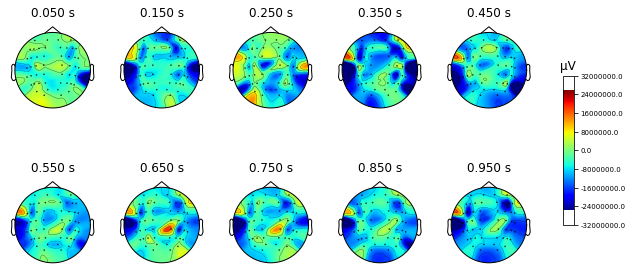

1


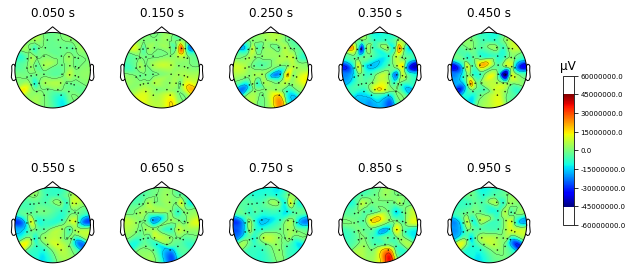

0


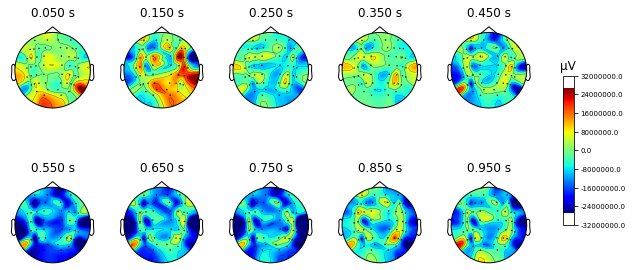

0


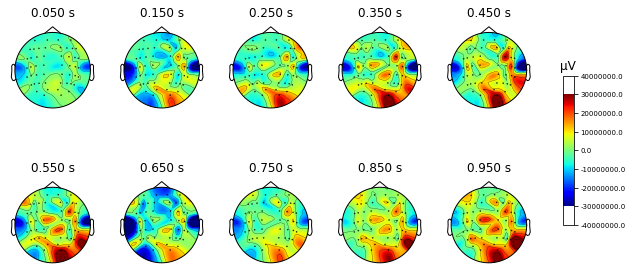

In [119]:
idx = -200
row=0
i=0
main = df[df.path == paths[ind_matrix[idx,i]]]
name = main['id'].values[0]
CLASS = []
PATHS = []
# plt.figure(figsize=[20,10])
# plt.subplot(3,3,1)
# plt.imshow(np.load(main['path'].values[0])['img'][:,:,0].T)
# plt.title(main['class'].values[0])
print(main['class'].values[0])
mask = np.load(main['path'].values[0])['img'][:,:,0].T
plot_eeg(mask)

while row<3:
    i+=1
    mini = df[df.path == paths[ind_matrix[0,i]]]
    if mini['id'].values[0] != name or True:
        row+=1
        PATHS.append(mini['path'].values[0])
        CLASS.append(mini['class'].values[0])
#         plt.subplot(3,3,row+1)
        mask = np.load(mini['path'].values[0])['img'][:,:,0].T
        print(mini['class'].values[0])
        plot_eeg(mask)
#         plt.imshow(np.load(mini['path'].values[0])['img'][:,:,0].T)
        
#         plt.title(mini['class'].values[0])
        
        

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]